In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Read and check the data
cancer = pd.read_csv('../Resources/data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Clean data
cancer = cancer.iloc[:,:-1]
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# K Nearest Neighbors methodology

In [4]:
# Ref: 21-2-6
# Data Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
target = cancer["diagnosis"]
data = cancer.drop("diagnosis", axis=1)
feature_names = data.columns
data.head()

Using TensorFlow backend.


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

k: 1, Train/Test Score: 1.000/0.769
k: 3, Train/Test Score: 0.911/0.755
k: 5, Train/Test Score: 0.845/0.734
k: 7, Train/Test Score: 0.793/0.748
k: 9, Train/Test Score: 0.765/0.727
k: 11, Train/Test Score: 0.735/0.692
k: 13, Train/Test Score: 0.737/0.692
k: 15, Train/Test Score: 0.730/0.678
k: 17, Train/Test Score: 0.725/0.678
k: 19, Train/Test Score: 0.718/0.685
k: 21, Train/Test Score: 0.709/0.706
k: 23, Train/Test Score: 0.702/0.713
k: 25, Train/Test Score: 0.714/0.713
k: 27, Train/Test Score: 0.700/0.699
k: 29, Train/Test Score: 0.695/0.699
k: 31, Train/Test Score: 0.697/0.699
k: 33, Train/Test Score: 0.692/0.692
k: 35, Train/Test Score: 0.688/0.699
k: 37, Train/Test Score: 0.690/0.699
k: 39, Train/Test Score: 0.688/0.699
k: 41, Train/Test Score: 0.678/0.671
k: 43, Train/Test Score: 0.678/0.671
k: 45, Train/Test Score: 0.671/0.671
k: 47, Train/Test Score: 0.650/0.664
k: 49, Train/Test Score: 0.650/0.664


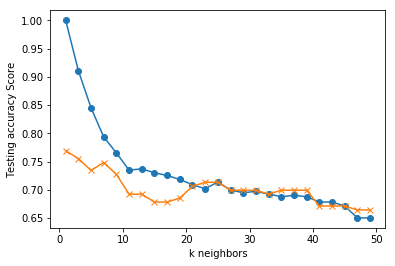

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 50, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print('k=7 Test Acc: %.3f' % knn.score(X_test, y_test))

k=7 Test Acc: 0.748


# Deep Learning Methodology_#Relu

In [8]:
X = cancer.drop("diagnosis", axis=1)
y = cancer["diagnosis"]
print(X.shape, y.shape)

(569, 31) (569,)


In [9]:
# Create a Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [11]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=31))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [12]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.4951 - acc: 0.7582
Epoch 2/60
 - 0s - loss: 0.2494 - acc: 0.9343
Epoch 3/60
 - 0s - loss: 0.1633 - acc: 0.9460
Epoch 4/60
 - 0s - loss: 0.1203 - acc: 0.9577
Epoch 5/60
 - 0s - loss: 0.0960 - acc: 0.9742
Epoch 6/60
 - 0s - loss: 0.0823 - acc: 0.9718
Epoch 7/60
 - 0s - loss: 0.0731 - acc: 0.9765
Epoch 8/60
 - 0s - loss: 0.0651 - acc: 0.9765
Epoch 9/60
 - 0s - loss: 0.0611 - acc: 0.9812
Epoch 10/60
 - 0s - loss: 0.0543 - acc: 0.9859
Epoch 11/60
 - 0s - loss: 0.0501 - acc: 0.9859
Epoch 12/60
 - 0s - loss: 0.0459 - acc: 0.9883
Epoch 13/60
 - 0s - loss: 0.0430 - acc: 0.9883
Epoch 14/60
 - 0s - loss: 0.0386 - acc: 0.9906
Epoch 15/60
 - 0s - loss: 0.0358 - acc: 0.9906
Epoch 16/60
 - 0s - loss: 0.0328 - acc: 0.9930
Epoch 17/60
 - 0s - loss: 0.0309 - acc: 0.9930
Epoch 18/60
 - 0s - loss: 0.0281 - acc: 0.9930
Epoch 19/60
 - 0s - loss: 0.0260 - acc: 0.9930
Epoch 20/60
 - 0s - loss: 0.0241 - acc: 0.9930
Epoch 21/60
 - 0s - loss: 0.0229 - acc: 0.9930
Epoch 22/60
 - 0s - lo

In [13]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.12388913922788904, Accuracy: 0.965034965034965


# Deep Learning Methodology_#Sigmoid


In [14]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_dim=31))
model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))

In [15]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 746us/step - loss: 0.6297 - acc: 0.6268
Epoch 2/60
426/426 [==============================] - 0s 80us/step - loss: 0.5400 - acc: 0.7136
Epoch 3/60
426/426 [==============================] - 0s 62us/step - loss: 0.4444 - acc: 0.8568
Epoch 4/60
426/426 [==============================] - 0s 61us/step - loss: 0.3539 - acc: 0.9014
Epoch 5/60
426/426 [==============================] - 0s 74us/step - loss: 0.2774 - acc: 0.9249
Epoch 6/60
426/426 [==============================] - 0s 61us/step - loss: 0.2224 - acc: 0.9343
Epoch 7/60
426/426 [==============================] - 0s 75us/step - loss: 0.1827 - acc: 0.9413
Epoch 8/60
426/426 [==============================] - 0s 78us/step - loss: 0.1530 - acc: 0.9460
Epoch 9/60
426/426 [==============================] - 0s 64us/step - loss: 0.1320 - acc: 0.9671
Epoch 10/60
426/426 [==============================] - 0s 67us/step - loss: 0.1169 - acc: 0.9742
Epoch 11/60
426/426 [=================

In [16]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.07438876152435851, Accuracy: 0.9790209790209791


# Deep Learning Methodology_#Linear

In [17]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='linear', input_dim=31))
model.add(Dense(units=50, activation='linear'))
model.add(Dense(units=2, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [19]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.19675358349757682, Accuracy: 0.958041958041958


# Deep Learning Methodology_#Tanh

In [20]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=31))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

In [21]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 1s 1ms/step - loss: 0.5662 - acc: 0.6972
Epoch 2/60
426/426 [==============================] - 0s 78us/step - loss: 0.1719 - acc: 0.9554
Epoch 3/60
426/426 [==============================] - 0s 64us/step - loss: 0.1137 - acc: 0.9718
Epoch 4/60
426/426 [==============================] - 0s 73us/step - loss: 0.0912 - acc: 0.9812
Epoch 5/60
426/426 [==============================] - 0s 71us/step - loss: 0.0798 - acc: 0.9859
Epoch 6/60
426/426 [==============================] - 0s 78us/step - loss: 0.0724 - acc: 0.9836
Epoch 7/60
426/426 [==============================] - 0s 86us/step - loss: 0.0674 - acc: 0.9812
Epoch 8/60
426/426 [==============================] - 0s 90us/step - loss: 0.0633 - acc: 0.9836
Epoch 9/60
426/426 [==============================] - 0s 82us/step - loss: 0.0591 - acc: 0.9836
Epoch 10/60
426/426 [==============================] - 0s 78us/step - loss: 0.0569 - acc: 0.9836
Epoch 11/60
426/426 [===================

In [22]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.11834168518096423, Accuracy: 0.965034965034965


# Decision Tree (C4.5)

In [23]:
#Ref: 21-2-4
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.92307692307692313

In [24]:
# WARNING! BOILERPLATE CODE HERE! 
# Use this to visualize the tree
import graphviz 
target_names = ["Benign", "Malignant"]
feature_names = data.columns
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    feature_names=feature_names,  
    class_names=target_names,  
    filled=True, rounded=True,  
    special_characters=True)  

import pydotplus
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree.png')

graph = graphviz.Source(dot_data)  
graph 

InvocationException: GraphViz's executables not found

# Naive Bayes (NB) 

In [25]:
from pyspark.sql import SparkSession

In [26]:
spark = SparkSession.builder.appName('cancer').getOrCreate()

In [27]:
# Import csv of spam and ham (not spam)
start_data = spark.read.format("csv").\
    option("header", "true").\
    option("delimiter", ",").\
    load("data.csv")
start_data.show()

+--------+---------+-----------+------------+--------------+---------+---------------+----------------+--------------+-------------------+-------------+----------------------+---------+----------+------------+-------+-------------+--------------+------------+-----------------+-----------+--------------------+------------+-------------+---------------+----------+----------------+-----------------+---------------+--------------------+--------------+-----------------------+----+
|      id|diagnosis|radius_mean|texture_mean|perimeter_mean|area_mean|smoothness_mean|compactness_mean|concavity_mean|concave points_mean|symmetry_mean|fractal_dimension_mean|radius_se|texture_se|perimeter_se|area_se|smoothness_se|compactness_se|concavity_se|concave points_se|symmetry_se|fractal_dimension_se|radius_worst|texture_worst|perimeter_worst|area_worst|smoothness_worst|compactness_worst|concavity_worst|concave points_worst|symmetry_worst|fractal_dimension_worst|_c32|
+--------+---------+-----------+------

In [28]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(
    X_train,
    y_train
)

GaussianNB(priors=None)

In [29]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.6267605633802817
Testing Data Score: 0.6223776223776224


# Random Forest